In [1]:
import sys
import logging
import getopt
import random
from enum import IntEnum
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import montyhall
from montyhall import logger, params
from montyhall.doors import original
from montyhall.host import host
from montyhall.player import player

In [3]:
params.plays=100000
params.total=10
params.open=2
params.guess=1
params.prized=2

In [4]:
def init_data_containers(n):
    dict = {}
    for i in range(n):
        dict[i] = 0
    return dict

In [5]:
def execute(params):
    wins = init_data_containers(params.plays)
    losses = init_data_containers(params.plays)
    for i in range(params.plays):
        hst = host()
        plyr = player()
        hst.doors.total = params.total
        hst.doors.prized = params.prized
        hst.total_doors_to_open = params.open
        hst.setup_doors()
        plyr.doorlist = hst.doors.get_all()
        plyr.total_doors_to_guess = params.guess
        plyr.make_guesses()
        guesses = plyr.guesses
        hst.accept_guesses(guesses)
        hst.open_doors()
        if params.always_switch:
            plyr.doorlist = hst.doors.get_all_switchable()
            plyr.make_guesses()
            new_guesses = plyr.guesses
            hst.accept_guesses(new_guesses)
        wins[i] += hst.won_guesses_count()
        losses[i] += hst.lost_guesses_count()
    return {'always switch': params.always_switch, 'wins': sum(wins.values()), 'losses': sum(losses.values()) }

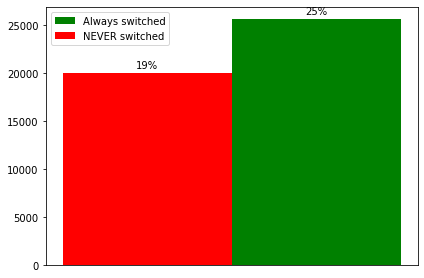

In [6]:
def autolabel(rects, denom):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(int(100*height/denom)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# labels = ['Always switched doors', 'Did NOT switch doors']
# x=np.arange(len(labels))
# x=np.arange(1)
width=0.1

res=[execute(params)['wins'] for params.always_switch in [True, False]]

fig, ax = plt.subplots()
yep=ax.bar(1+width/2, res[0], width, label='Always switched', color='green')
nope=ax.bar(1-width/2, res[1], width, label='NEVER switched', color='red')

autolabel(yep, params.plays)
autolabel(nope, params.plays)

ax.set_xticks([])
# ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.show()
